# Análisis de peso de peces según sus dimensiones

El siguiente análisis modela la relación entre las dimensiones de una muestra ejemplares de diversas especies de peces con su peso. El dataset utilizado se encuentra disponible en https://www.kaggle.com/aungpyaeap/fish-market?select=Fish.csv.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de dataset

In [2]:
df = pd.read_csv(r"./Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df1 = df

remove = ["Species"]

df1 = df1.drop(remove, axis = 1)

In [5]:
df2 = df1[df1["Weight"] > 0]

In [6]:
df2.shape

(158, 6)

In [7]:
df = df2

El dataset presenta 159 muestras y 6 columnas

### Declaración de variables predictoras y target

In [8]:
target = ["Weight"]
predictoras = [x for x in df.columns.values if x not in target]

x = df[predictoras]
y = df[target]

### Visualización en gráfico de dispersión

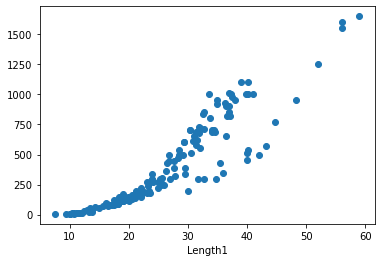

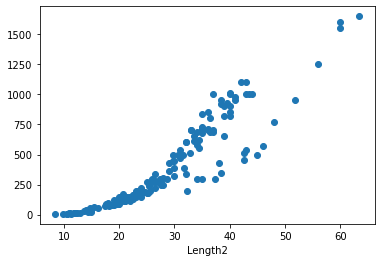

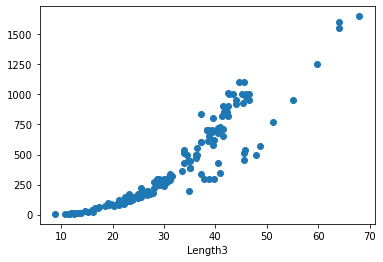

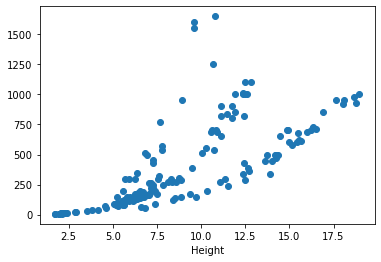

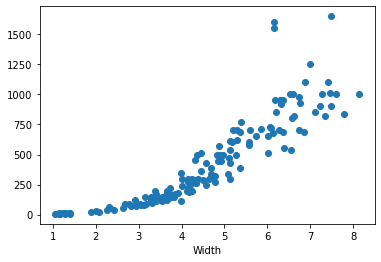

In [9]:
for var in x.columns.values:
    plt.scatter(x[var], y)
    plt.xlabel(var)
    plt.show()

### Modelado

In [10]:
# Las variables se vinculan a través de una función logarítmica, por lo que se transforma la dependiente

logy = np.log(y)

rl = linear_model.LinearRegression()
rl.fit(x, logy)

n = 5
selector = RFE(rl, n_features_to_select=n, step=1)
selector = selector.fit(x, logy)

coeficientes = list(zip(predictoras, rl.coef_[0], selector.ranking_))
coeficientes.sort(key=lambda tup: tup[2])
coeficientes, rl.intercept_

([('Length1', -0.3570601118338281, 1),
  ('Length2', 0.35835235302664736, 1),
  ('Length3', 0.02372812497763176, 1),
  ('Height', 0.04641567517870725, 1),
  ('Width', 0.34573916191442344, 1)],
 array([1.90840785]))

### Evaluación

In [11]:
y_pred = rl.predict(x)

mean_squared_error(logy, y_pred), r2_score(logy, y_pred), np.sqrt(mean_squared_error(logy, y_pred))

(0.12247107859986123, 0.9299198130533364, 0.34995868127517743)

El MSE es 0.1224 y el estadístico R2 es 0.9299

### Visualización de resultados

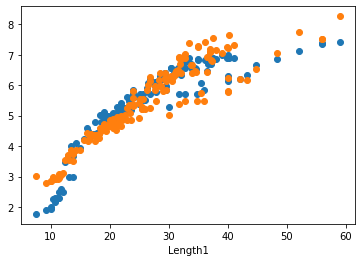

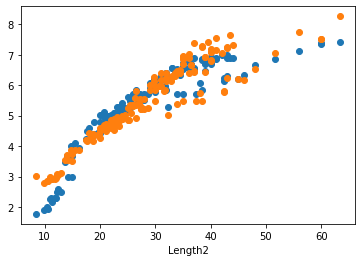

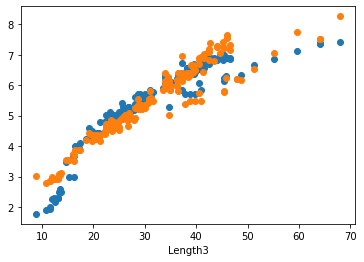

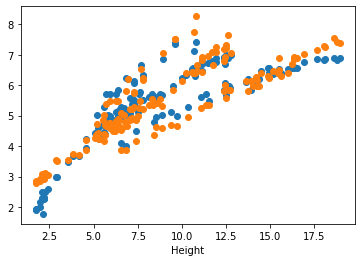

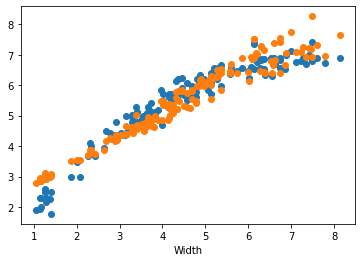

In [12]:
for var in x.columns.values:
    plt.scatter(x[var], logy)
    plt.scatter(x[var], y_pred)
    plt.xlabel(var)
    plt.show()